In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from pathlib import Path

# 2D plot of fault id

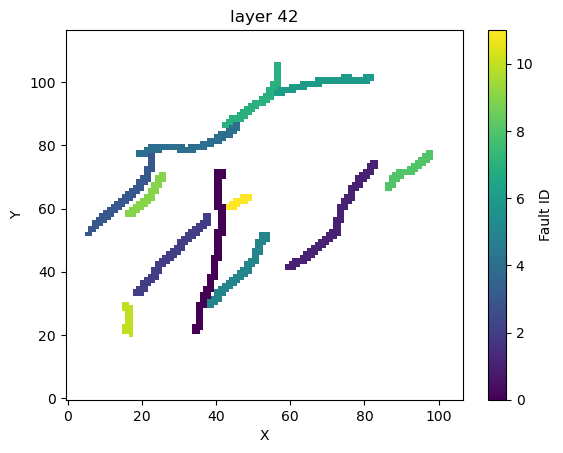

In [16]:
prop = "PRES"; layer = 42; 
arr = np.load('results/JD_Sula_2025_flow_coor&fault.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,3]
plt.imshow(arr_slice.T, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=11)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Fault ID")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'layer {layer}')
plt.show()

### plot faults from gmc grid

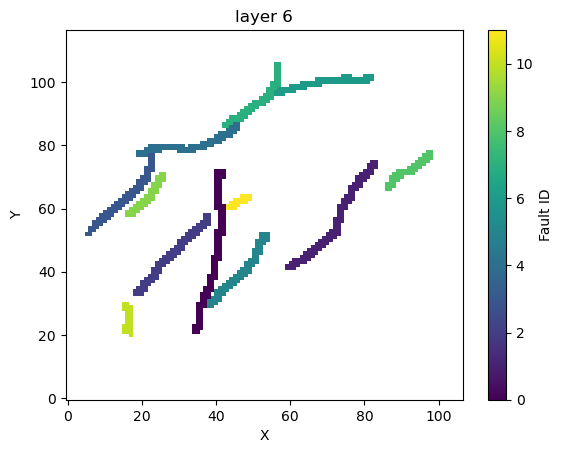

In [24]:
prop = "PRES"; layer = 6; 
arr = np.load('results/JD_Sula_2025_gmc_coor&fault.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,3]
plt.imshow(arr_slice.T, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=11)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Fault ID")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'layer {layer}')
plt.show()

# 2D plot of pressure

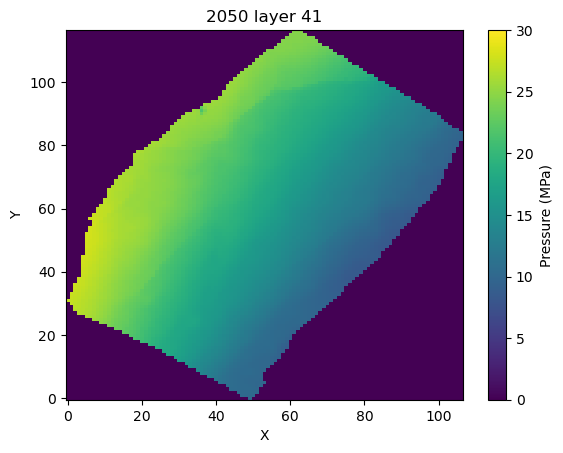

In [3]:
prop = "PRES"; layer = 41; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load('results/case1_PRES.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T/1000, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=30)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

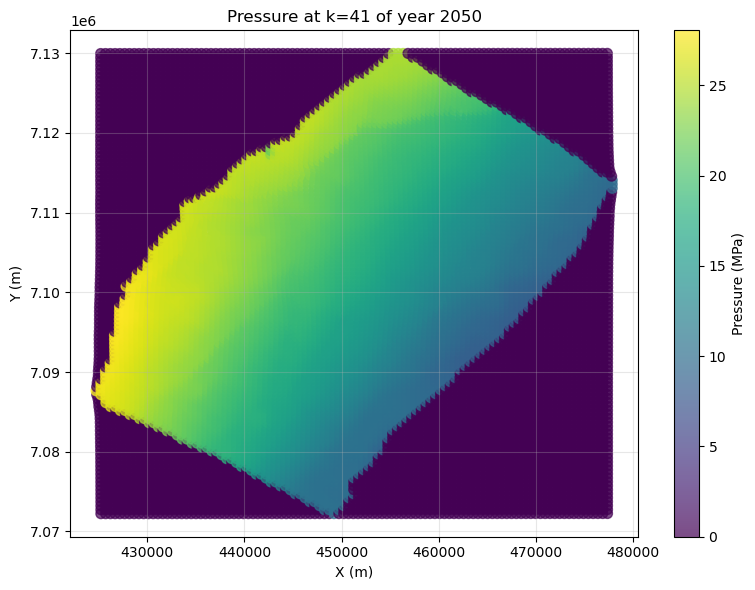

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# parameters
figsize = (8, 6)
layer = 41; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault.npy')
pres = np.load('results/case1_PRES.npy')

# Filter data for the specific k layer
x_coor = coor_fault[:,:,layer-1,0].flatten()
y_coor = coor_fault[:,:,layer-1,1].flatten()
fault_id = coor_fault[:,:,layer-1,3].flatten()
pres_val = pres[:,:,layer-1,year_list.index(year)].flatten()/1000 # convert to MPa

# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=figsize)

# Color by property value
scatter = ax.scatter(x_coor, y_coor, 
                    c=pres_val, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, ax=ax, label='Pressure (MPa)')
title = f'Pressure at k={layer} of year {year}'

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title(title)
ax.grid(True, alpha=0.3)

plt.tight_layout()

# 2D plot of fault slip

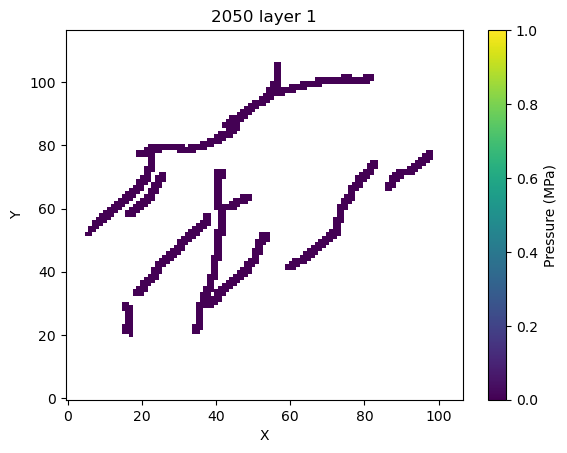

In [5]:
layer = 1; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load('data/250919_FSA/case1_FSA.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=1)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

In [14]:
my_array = np.load('results/fault_slip_gmc/case2_fault_slip.npy') 
print(my_array.shape)
num_zeros = np.count_nonzero(my_array == 0)
print(f"Number of zeros: {num_zeros}")
print(num_zeros/(107*117*5*6))
# Calculate basic statistics for all elements
mean_val = np.mean(my_array)
median_val = np.median(my_array)
std_dev = np.std(my_array)
min_val = np.min(my_array)
max_val = np.max(my_array)
sum_val = np.sum(my_array)
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Sum: {sum_val}")
print((my_array == 0).sum())

(107, 117, 5, 6)
Number of zeros: 375523
0.9998748568842026
Mean: 0.00012514311579732142
Median: 0.0
Standard Deviation: 0.01
Min: 0
Max: 1
Sum: 47
375523


# 2D plot of stress

In [69]:
arr = np.load('data/250819_stresses/case1_STRESINT.npy') 
contains_zero = np.any(arr==0)
print(contains_zero)
print((arr==0).sum())
print(np.count_nonzero(~np.isnan(arr)))
print((arr==0).sum()/np.count_nonzero(~np.isnan(arr)))

True
270
25320
0.01066350710900474


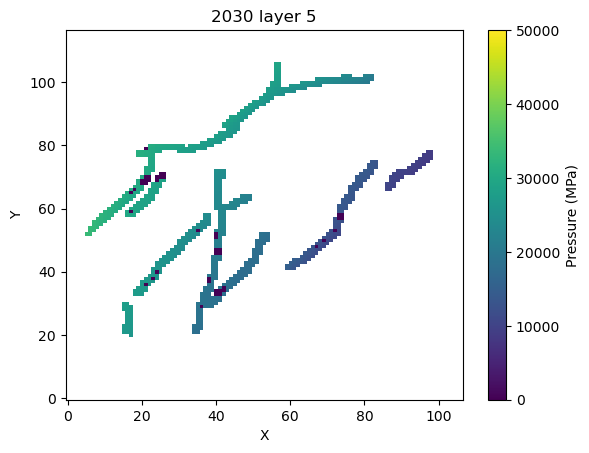

In [65]:
prop = "PRES"; layer = 5; year = 2030; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load('data/250819_stresses/case1_STRESINT.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=50000)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

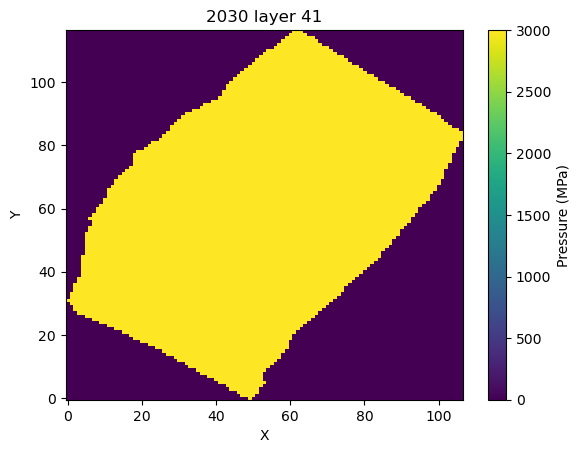

In [51]:
prop = "PRES"; layer = 41; year = 2030; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load('data/results_trimmed_gmc/case1_PRES.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=3000)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

# 2D plots of npy files

In [5]:
data_folder_path = Path('data')
#property options: SG, PRES, VERDSPLGEO, GEORTYPE
arr = np.load(data_folder_path / 'rst_npy' / 'case1_SG.npy')
arr.shape

(117, 107, 39, 6)

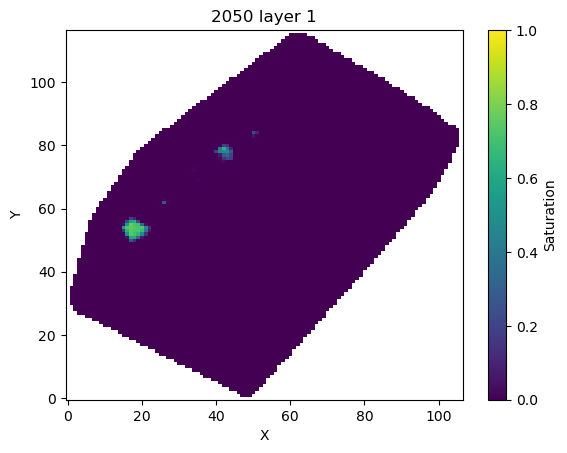

In [8]:
prop = "SG"; layer = 1; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load(data_folder_path / 'rst_npy' / f'case1_{prop}.npy') #SG, PRES, VERDSPLGEO
plt.imshow(arr[:,:,layer-1,year_list.index(year)], origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=1)
# plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Saturation")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

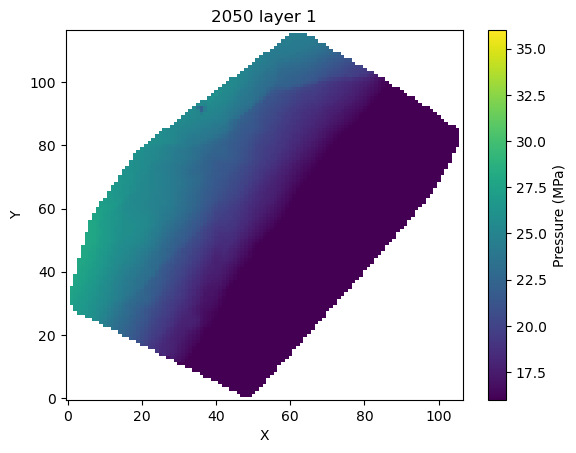

In [ ]:
prop = "PRES"; layer = 1; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load(data_folder_path / 'rst_npy' / f'case1_{prop}.npy') #SG, PRES, VERDSPLGEO
plt.imshow(arr[:,:,layer-1,year_list.index(year)]/1000, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=16, vmax=36)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()